In [1]:
# evaluate the change of the VarBC coefficients
# initial built: 2024/06/19
# temporary script for single cycle experiment: 2024/06/28

import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
print(cartopy.__version__)

0.21.1


In [6]:
inq_time = '2022070100'
#expname  = ['CTRL','CTRL_no_situ','CTRL_bc0_inf','CTRL_bc0_noinf','CTRL_bc1_inf','CTRL_bc1_noinf']
#expname  = ['CTRL','CTRL_no_situ','CTRL_bc1_inf','CTRL_bc1_noinf']
expname = ['CTRL','CTRL_no_situ','CTRL_bc0_inf','CTRL_bc0_noinf','CTRL_bc1_inf','CTRL_bc1_noinf']


instr    = 'amsua_n15'
gesanl   = 'ges'
chn      = 2

rr={};
for i in range(len(expname)):
    if expname[i] == 'CTRL':
        rr[i]=nc.Dataset(f"/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/amsua/new_ctrl_amsua_atms/diag_{instr}_{gesanl}.{inq_time}.nc4")
    elif expname[i] == 'CTRL_no_situ':
        rr[i]=nc.Dataset(f"/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/amsua/new_ctrl_amsua_atms_no_situ_only_scatter_wind/diag_{instr}_{gesanl}.{inq_time}.nc4")
    elif expname[i] == 'CTRL_bc0_inf':
        rr[i]=nc.Dataset(f"/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/varBC_exp_new/new_ctrl_amsua_atms_bc0_inf_single/gdas.20220701/00/atmos/radstat_tmp/diag_{instr}_{gesanl}.{inq_time}.nc4")
    elif expname[i] == 'CTRL_bc0_noinf':
        rr[i]=nc.Dataset(f"/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/varBC_exp_new/new_ctrl_amsua_atms_bc0_noinf_single/gdas.20220701/00/atmos/radstat_tmp/diag_{instr}_{gesanl}.{inq_time}.nc4")
    elif expname[i] == 'CTRL_bc1_inf':
        rr[i]=nc.Dataset(f"/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/varBC_exp_new/new_ctrl_amsua_atms_bc1_inf_single/gdas.20220701/00/atmos/radstat_tmp/diag_{instr}_{gesanl}.{inq_time}.nc4")
    elif expname[i] == 'CTRL_bc1_noinf':
        rr[i]=nc.Dataset(f"/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/varBC_exp_new/new_ctrl_amsua_atms_bc1_noinf_single/gdas.20220701/00/atmos/radstat_tmp/diag_{instr}_{gesanl}.{inq_time}.nc4")

In [7]:
lat={}; lon={}; omf={}; omfnbc={}; fwater={}; ch={}; qc={};
bc_cnst={}; bc_scan_angle={}; bc_clw={}; bc_lapse={}; bc_lapse_sq={}; bc_emis={}; bc_angord={};

for i in range(len(expname)):
    lat[i]        = rr[i].variables['Latitude'][:]
    lon[i]        = rr[i].variables['Longitude'][:]
    omf[i]        = rr[i].variables['Obs_Minus_Forecast_adjusted'][:]
    omfnbc[i]     = rr[i].variables['Obs_Minus_Forecast_unadjusted'][:]
    fwater[i]     = rr[i].variables['Water_Fraction'][:]
    ch[i]         = rr[i].variables['Channel_Index'][:]
    qc[i]         = rr[i].variables['QC_Flag'][:]

    # varBC coefficients:
    bc_cnst[i]       = rr[i].variables['BC_Constant'][:]
    bc_scan_angle[i] = rr[i].variables['BC_Scan_Angle'][:]
    bc_clw[i]        = rr[i].variables['BC_Cloud_Liquid_Water'][:]
    bc_lapse[i]      = rr[i].variables['BC_Lapse_Rate'][:]
    bc_lapse_sq[i]   = rr[i].variables['BC_Lapse_Rate_Squared'][:]
    bc_emis[i]       = rr[i].variables['BC_Emissivity'][:]
    bc_angord[i]     = rr[i].variables['BC_angord'][:,:] #???

In [8]:
sea_screen={};
lat_use={}; lon_use={}; omf_use={}; omfnbc_use={}; 
bc_cnst_use={}; bc_lapse_use={}; bc_lapse_sq_use={}; bc_emis_use={}; bc_angord_use={};

for i in range(len(expname)):
    sea_screen[i]  = (fwater[i]>= 0.99)
    use            = np.where( (qc[i] == 0)&(ch[i]==chn)&sea_screen[i] )
    #use         =  np.where( (qc == 0)&(ch==chn) )

    lat_use[i]         = lat[i][use]
    lon_use[i]         = lon[i][use]
    omf_use[i]         = omf[i][use]
    omfnbc_use[i]      = omfnbc[i][use]
    bc_cnst_use[i]     = bc_cnst[i][use]
    bc_lapse_use[i]    = bc_lapse[i][use]
    bc_lapse_sq_use[i] = bc_lapse_sq[i][use]
    #bc_clw_use      = bc_clw[use]
    bc_emis_use[i]     = bc_emis[i][use]
    #bc_scan_use     = bc_scan_angle[use]
    #bc_cos_use      = bc_cos_lat[use]
    #bc_sin_use      = bc_sin_lat[use]

    tmp = np.zeros_like(lat_use[i])
    bc_angord_use[i] = np.tile(tmp,(4,1))

    for j in range(4):
        bc_angord_use[i][j,:]   = bc_angord[i][use,j]

In [9]:
# check the constant and total

for i, exp in enumerate(expname):
    print(f'global mean varBC inc {inq_time} {instr} ch{chn}  from {exp} = ', np.mean(omfnbc_use[i]-omf_use[i]))

print()
    
for i, exp in enumerate(expname):
    print(f'global offset {inq_time} {instr} ch{chn}  from {exp} = ', np.mean(bc_cnst_use[i]))

global mean varBC inc 2022070100 amsua_n15 ch2  from CTRL =  1.1694424
global mean varBC inc 2022070100 amsua_n15 ch2  from CTRL_no_situ =  1.907094
global mean varBC inc 2022070100 amsua_n15 ch2  from CTRL_bc0_inf =  1.2120972
global mean varBC inc 2022070100 amsua_n15 ch2  from CTRL_bc0_noinf =  1.2120972
global mean varBC inc 2022070100 amsua_n15 ch2  from CTRL_bc1_inf =  1.9029433
global mean varBC inc 2022070100 amsua_n15 ch2  from CTRL_bc1_noinf =  1.9029433

global offset 2022070100 amsua_n15 ch2  from CTRL =  1.7395242
global offset 2022070100 amsua_n15 ch2  from CTRL_no_situ =  2.3971193
global offset 2022070100 amsua_n15 ch2  from CTRL_bc0_inf =  1.7395244
global offset 2022070100 amsua_n15 ch2  from CTRL_bc0_noinf =  1.7395244
global offset 2022070100 amsua_n15 ch2  from CTRL_bc1_inf =  2.3971193
global offset 2022070100 amsua_n15 ch2  from CTRL_bc1_noinf =  2.3971193


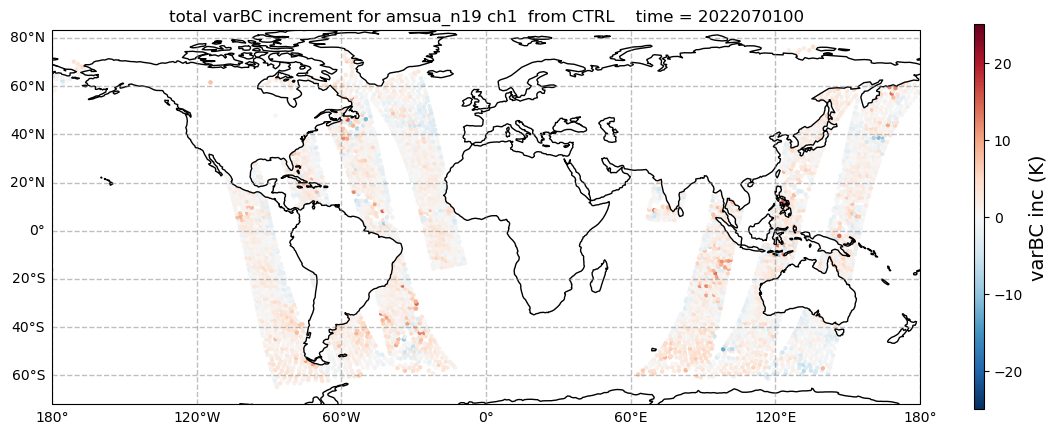

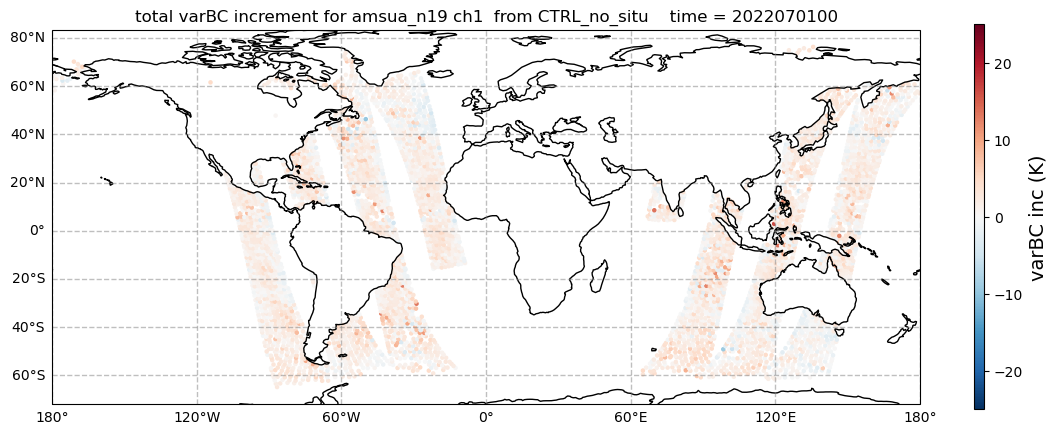

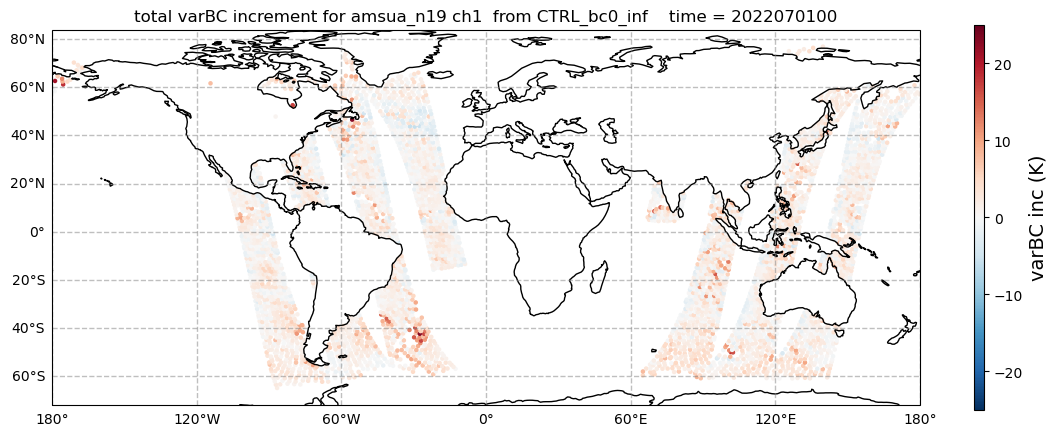

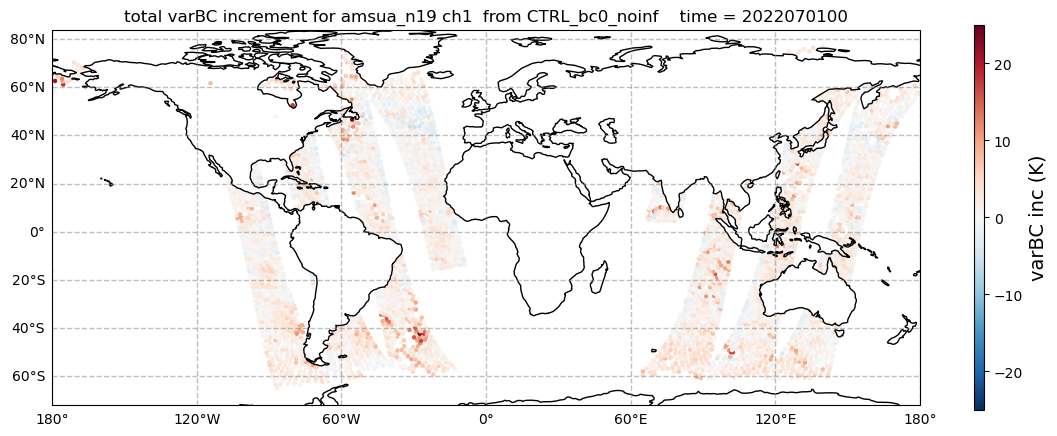

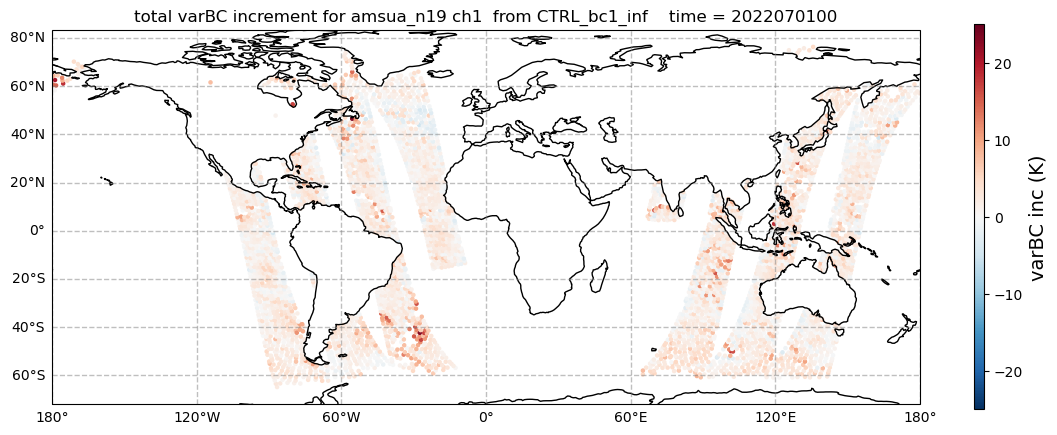

In [72]:
# check omfnbc (omf without BC)
for i, exp in enumerate(expname):
    fig = plt.figure(figsize=(14,5))
    ax = fig.add_subplot(projection=ccrs.PlateCarree())

    ax.coastlines()
    scatter1 = ax.scatter(lon_use[i], lat_use[i], c=omfnbc_use[i], s=5, vmin=-25, vmax=25, cmap='RdBu_r')
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    ax.set_title(f'total varBC increment for {instr} ch{chn}  from {exp}    time = {inq_time}')
    cbar = fig.colorbar(scatter1,location='right',aspect=40)
    cbar.set_label('varBC inc (K)', fontsize=14)

KeyError: 4

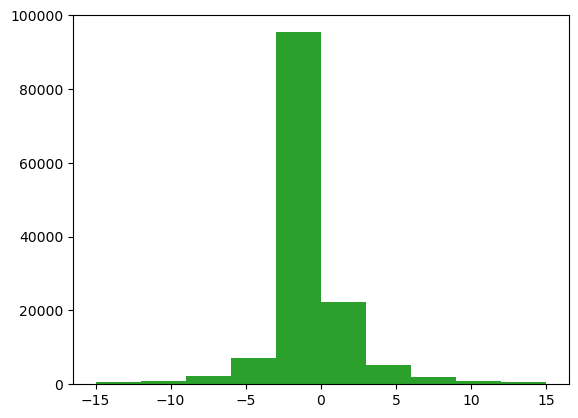

In [7]:
#expname  = ['CTRL','CTRL_no_situ','CTRL_bc0_inf','CTRL_bc0_noinf','CTRL_bc1_inf','CTRL_bc1_noinf']
#               0          1             2                3               4               5
bins = np.arange(-15, 16, 3)

# comments:
# I think by examining omfnbc, everything should be the same
# maybe crtm is different, but still 2=3=4=5 (why not)



n0, bins, _  = plt.hist(omfnbc[0], bins=bins)
n2, bins, _  = plt.hist(omfnbc[2], bins=bins)
n3, bins, _  = plt.hist(omfnbc[3], bins=bins)
n4, bins, _  = plt.hist(omfnbc[4], bins=bins)
n5, bins, _  = plt.hist(omfnbc[5], bins=bins)

print('ombnbc::')
print('CTRL =           ', n0)
print('CTRL_BC0_INF =   ', n2)
print('CTRL_BC0_NOINF = ', n3)
print('CTRL_BC1_INF =   ', n4)
print('CTRL_BC1_NOINF = ', n5)

n0, bins, _  = plt.hist(omf[0], bins=bins)
n2, bins, _  = plt.hist(omf[2], bins=bins)
n3, bins, _  = plt.hist(omf[3], bins=bins)
n4, bins, _  = plt.hist(omf[4], bins=bins)
n5, bins, _  = plt.hist(omf[5], bins=bins)

print('')
print('omb::')
print('CTRL =           ', n0)
print('CTRL_BC0_INF =   ', n2)
print('CTRL_BC0_NOINF = ', n3)
print('CTRL_BC1_INF =   ', n4)
print('CTRL_BC1_NOINF = ', n5)


In [115]:
print(len(omfnbc[0]))
print(len(omfnbc[2]))
print(len(omfnbc[3]))
print(len(omfnbc[4]))
print(len(omfnbc[5]))

138765
138765
138765
138765
138765
